## <b>Image Thresholding</b>
It can be identified as Image segmentation based on Intensity Values of Pixel.

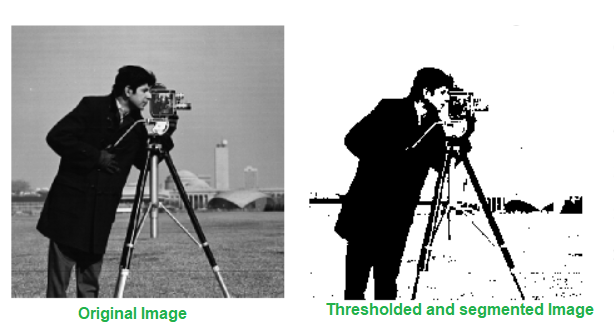

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image_0 = cv2.imread("./Images/Test_image_6.png")
image_1 = cv2.imread("./Images/Test_image_5.png")
image_2 = cv2.imread("./Images/Test_image_7.png")

### <b>Simple Global Thresholding</b>

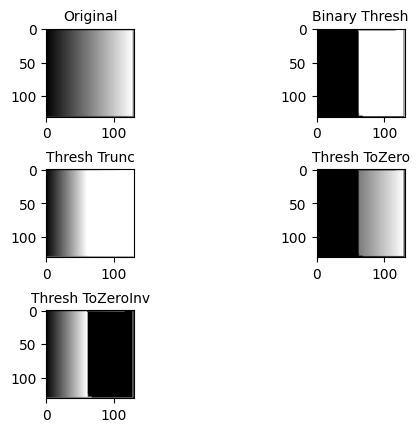

In [6]:
img = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

# applying different thresholding techniques on the input image
# all pixels value above 120 will be set to 255
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)
  
# the window showing output images with the corresponding thresholding techniques applied to the input images
plt.subplot(321),plt.imshow(img,cmap='gray'), plt.title("Original",fontsize=10)
plt.subplot(322), plt.imshow(thresh1,cmap='gray'), plt.title("Binary Thresh",fontsize=10)
plt.subplot(323), plt.imshow(thresh2,cmap='gray'), plt.title("Binary Thresh Invert",fontsize=10)
plt.subplot(323), plt.imshow(thresh3,cmap='gray'), plt.title("Thresh Trunc",fontsize=10)
plt.subplot(324), plt.imshow(thresh4,cmap='gray'), plt.title("Thresh ToZero",fontsize=10)
plt.subplot(325), plt.imshow(thresh5,cmap='gray'), plt.title("Thresh ToZeroInv",fontsize=10)
plt.subplots_adjust(hspace=0.6)
plt.show()

### <b>Otsu Thersholding</b>

* initialize w_i(0), \mu_i(0)
* iterate over possible thresholds: t = 0,..., max\_intensity

    * update the values of w_i, \mu_i, where w_i is a probability and \mu_i is a mean of class i

    * calculate the between-class variance value \sigma_b^2(t)

* the final threshold is the maximum \sigma_b^2(t) value

### Method-1 
mathematical calulation based

In [7]:
# # Determine threshold of Otsu's binarization
# H, W, C = image_0.shape

# out = cv2.cvtColor(image_0, cv2.COLOR_BGR2GRAY).astype(np.uint8)
# max_sigma = 0
# max_t = 0

 
# for _t in range(1, 255):
#     v0 = out[np.where(out < _t)]
#     m0 = np.mean(v0) if len(v0) > 0 else 0.
#     w0 = len(v0) / (H * W)
#     v1 = out[np.where(out >= _t)]
#     m1 = np.mean(v1) if len(v1) > 0 else 0.
#     w1 = len(v1) / (H * W)
#     sigma = w0 * w1 * ((m0 - m1) ** 2)
#     if sigma > max_sigma:
#         max_sigma = sigma
#         max_t = _t
# th = max_t
# out[out < th] = 0
# out[out >= th] = 255

# plt.subplot(121), plt.imshow(image_0,cmap='gray'), plt.title("Original",fontsize=10)
# plt.subplot(122), plt.imshow(out,cmap='gray'), plt.title("Otsu Thresholding",fontsize=10)   
# plt.show()

### Method-2
Opencv method based

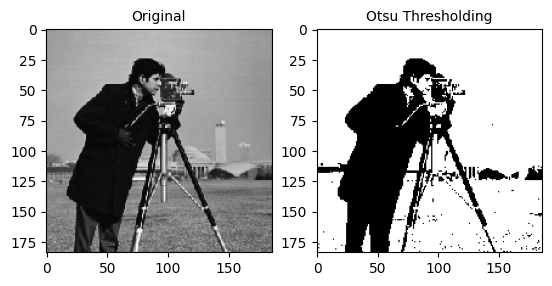

In [8]:
# cv2.cvtColor is applied over the image input with applied parameters
# to convert the image in grayscale
img = cv2.cvtColor(image_0, cv2.COLOR_BGR2GRAY)
  
# applying Otsu thresholding as an extra flag in binary thresholding     
otus_threshold_value , thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)     
   
plt.subplot(121), plt.imshow(image_0,cmap='gray'), plt.title("Original",fontsize=10)
plt.subplot(122), plt.imshow(thresh1,cmap='gray'), plt.title("Otsu Thresholding",fontsize=10)   
plt.show()

### <b>Adaptive Thresholding</b>

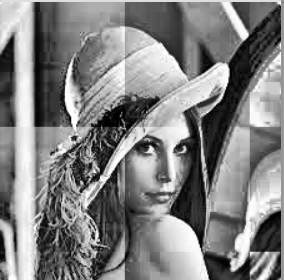

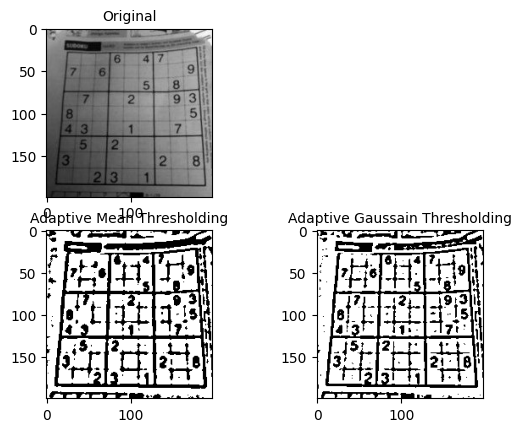

In [13]:
img = cv2.GaussianBlur(image_2,(5,5),0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)

plt.subplot(221), plt.imshow(image_2,cmap='gray'), plt.title("Original",fontsize=10)
plt.subplot(223), plt.imshow(th1,cmap='gray'), plt.title("Adaptive Mean Thresholding",fontsize=10)   
plt.subplot(224), plt.imshow(th2,cmap='gray'), plt.title("Adaptive Gaussain Thresholding",fontsize=10)   
plt.show()